In [1]:
# env: pycodex_250920
import random

import matplotlib.pyplot as plt
import numpy as np
import tifffile
from pyqupath.tiff import TiffZarrReader

from pycodex.visualization.multiplex import create_rgb_multiplex
from pycodex.visualization.segmentation_mask import (
    ax_plot_segmentation_labels,
    create_rgb_annotation,
    create_rgb_with_segmentation_boundaries,
    find_segmentation_boundaries,
)
from pycodex.visualization.utils import ax_plot_legend, ax_plot_rgb_with_scalebar

# 00. Data

In [2]:
# multiplex image
reader = TiffZarrReader.from_ometiff(
    "/mnt/nfs/home/wenruiwu/projects/pycodex/demo/data/segmentation/reg001/reg001.ome.tiff"
)
img_dict = reader.zimg_dict
{marker: img_dict[marker] for i, marker in enumerate(img_dict.keys()) if i < 6}

{'H&E_R': <zarr.core.Array (1000, 1000) uint16>,
 'H&E_G': <zarr.core.Array (1000, 1000) uint16>,
 'H&E_B': <zarr.core.Array (1000, 1000) uint16>,
 'dst_register': <zarr.core.Array (1000, 1000) uint16>,
 'src_register': <zarr.core.Array (1000, 1000) uint16>,
 'DAPI': <zarr.core.Array (1000, 1000) uint16>}

(1000, 1000)


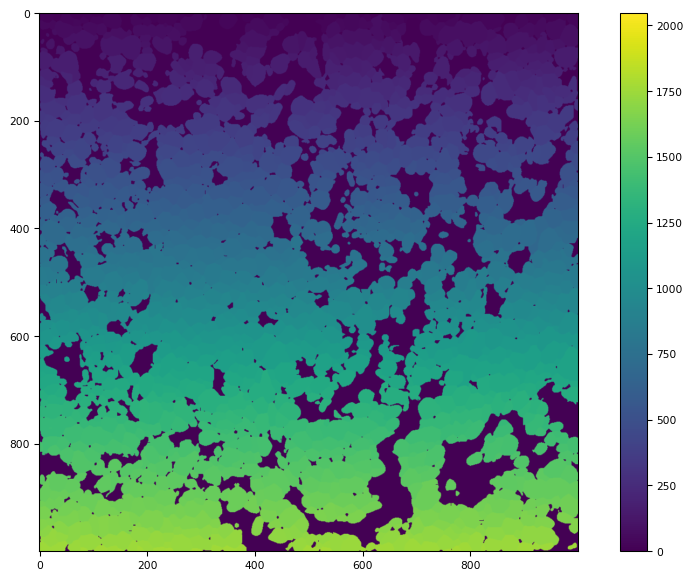

In [3]:
# segmentation mask
segmentation_mask = tifffile.imread(
    "/mnt/nfs/home/wenruiwu/projects/pycodex/demo/data/segmentation_mask/segmentation_mask.tiff"
)
print(segmentation_mask.shape)
tifffile.imshow(segmentation_mask);

In [4]:
# small region
xmin, ymin = 300, 300
step = 100
xmax, ymax = xmin + step, ymin + step
print(f"x: {xmin}-{xmax}, y: {ymin}-{ymax}")

x: 300-400, y: 300-400


# 01. Plot Segmentation Boundaries and Labels

(1000, 1000)


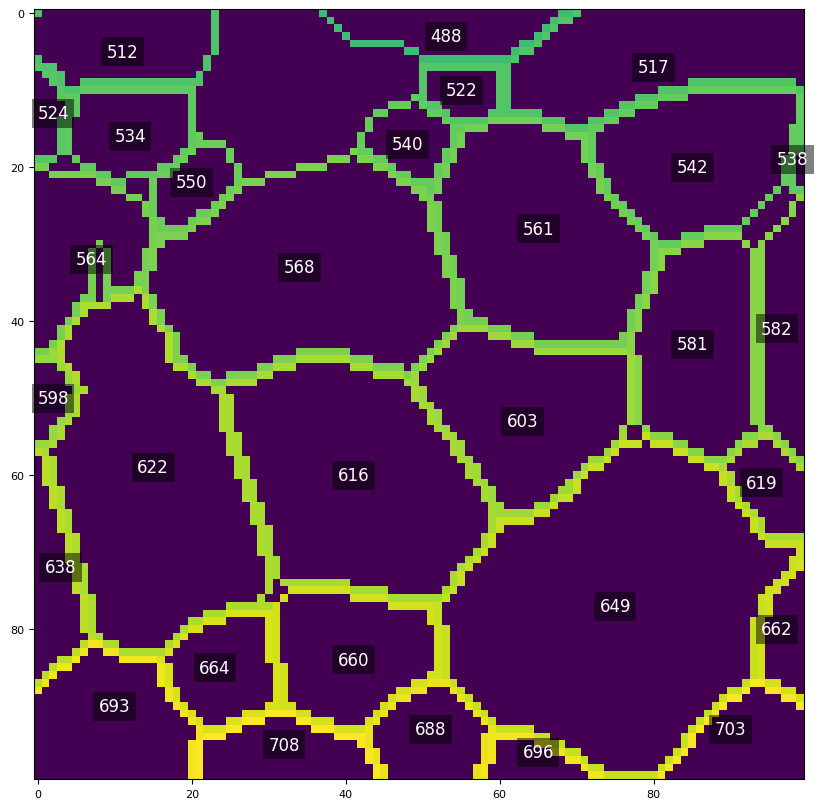

In [5]:
segmentation_boundaries = find_segmentation_boundaries(segmentation_mask)
print(segmentation_boundaries.shape)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(segmentation_boundaries[ymin:ymax, xmin:xmax])
ax_plot_segmentation_labels(segmentation_mask[ymin:ymax, xmin:xmax])

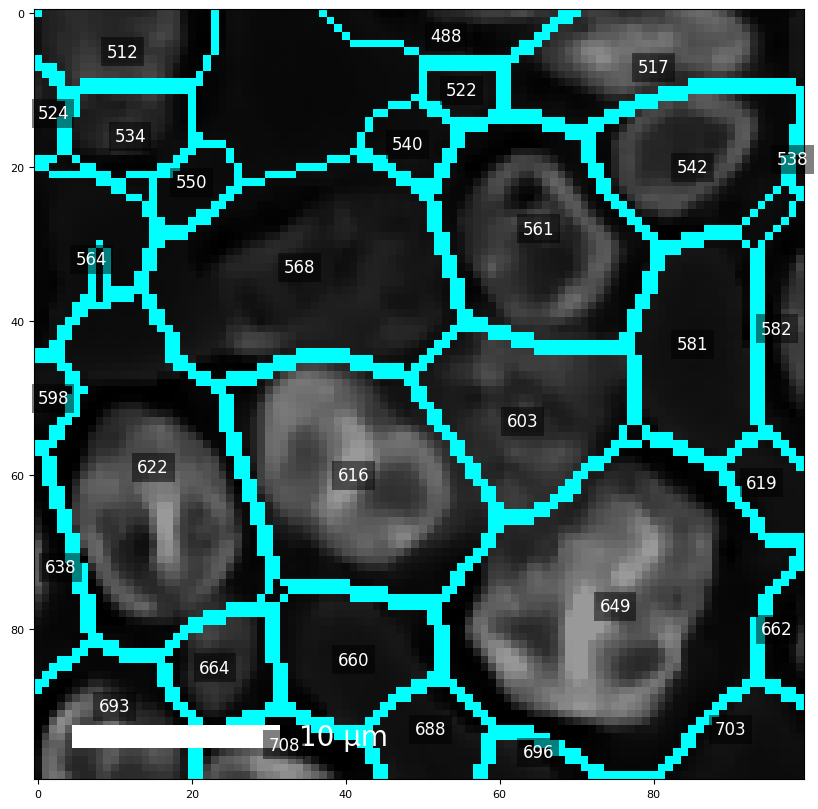

In [6]:
rgb_dapi = create_rgb_multiplex(
    img_dict,
    marker_color_dict={"DAPI": "#999999"},
    marker_cutoff_dict={
        "DAPI": [
            np.percentile(img_dict["DAPI"], 1),
            np.percentile(img_dict["DAPI"], 99),
        ]
    },
    markers_to_plot=["DAPI"],
)
rgb_dapi_boundary = create_rgb_with_segmentation_boundaries(rgb_dapi, segmentation_mask)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax_plot_rgb_with_scalebar(
    rgb_dapi_boundary[ymin:ymax, xmin:xmax],
    mpp=0.37,
    bar_width_um=10,
    bar_height_px=3,
    text_to_bar_px=2,
    text_size=20,
)
ax_plot_segmentation_labels(segmentation_mask[ymin:ymax, xmin:xmax])

# 02. Plot Phenotype Map

In [7]:
color_dict = {
    "Immune": "#f5eb00",
    "Fibroblast": "#0781be",
    "Endothelial": "#9f4d9d",
    "Epithelial": "#f47621",
    "Others": "#808080",
}
unique_labels = np.unique(segmentation_mask)
unique_labels = unique_labels[unique_labels != 0]

print(f"unique labels (n = {len(unique_labels)}): {unique_labels}")

unique labels (n = 1773): [   1    2    3 ... 1771 1772 1773]


In [8]:
random.seed(123)
annotations = random.choices(
    list(color_dict.keys()),
    k=len(unique_labels),
)
annotation_dict = dict(zip(unique_labels, annotations))
{label: annotation_dict[label] for i, label in enumerate(annotation_dict) if i < 5}

{1: 'Immune', 2: 'Immune', 3: 'Endothelial', 4: 'Immune', 5: 'Others'}

(1000, 1000, 3)


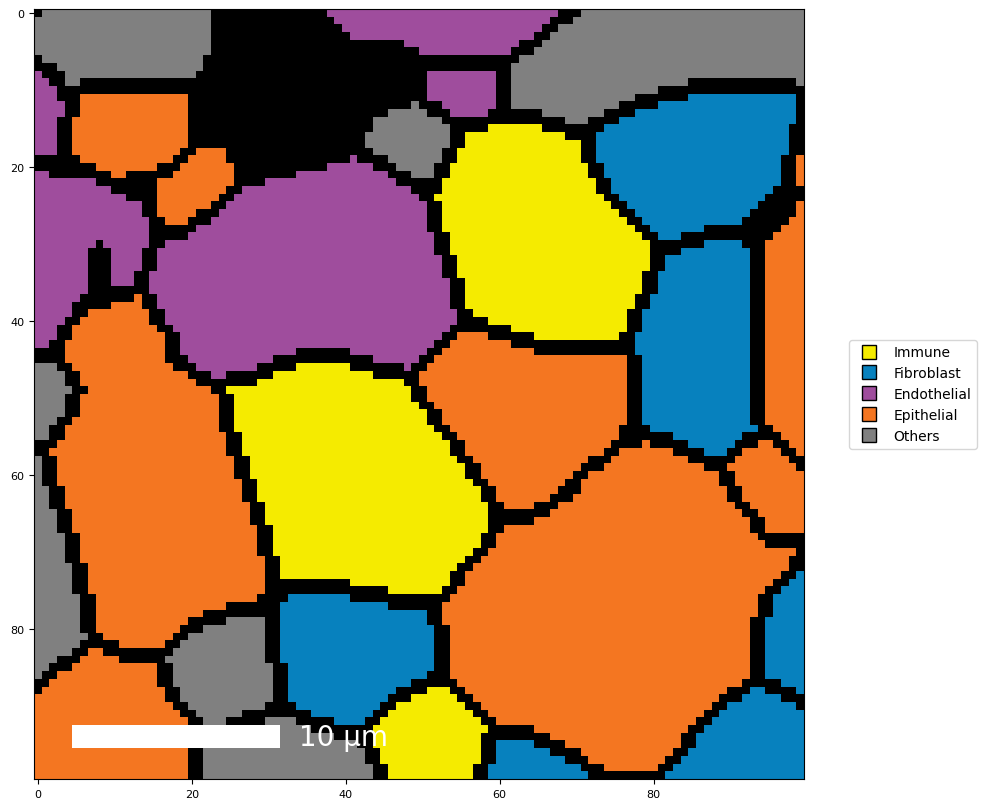

In [9]:
rgb_annotation = create_rgb_annotation(
    segmentation_mask,
    annotation_dict,
    color_dict,
    boundary=True,
)
print(rgb_annotation.shape)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax_plot_rgb_with_scalebar(
    rgb_annotation[ymin:ymax, xmin:xmax],
    mpp=0.37,
    bar_width_um=10,
    bar_height_px=3,
    text_to_bar_px=2,
    text_size=20,
)
ax_plot_legend(color_dict)